In [60]:
import os
import numpy as np

import pandas as pd

from scipy import stats
from scipy.interpolate import interp1d

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import pandas as pd
import glob
import natsort

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from RSRTxReadBin import RTxReadBin

/var/folders/hg/n17fww195g9887twwb23k9k40000gn/T/ipykernel_58035/3193881200.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


slope 0.559296257722442
y-oeff -0.22734294032712382


"\nax.spines['right'].set_color('none')\nax.spines['top'].set_color('none')\nax.xaxis.set_ticks_position('bottom')\nax.spines['bottom'].set_position(('data', 0))\nax.yaxis.set_ticks_position('left')\nax.spines['left'].set_position(('data', 0))\n"

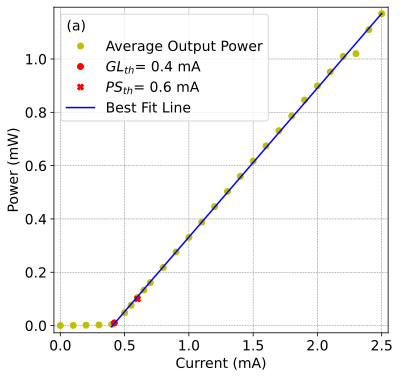

In [61]:
# L-I Linear

'''
# data for 780 nm VCSEL

laser_power_mA = np.array([0,0.099,0.1,0.11,0.125,0.15,0.201,0.329,0.432,0.482,0.542,0.658,0.726,0.778,
                        0.795,0.808,0.850,0.878,0.904,0.924,0.937,0.961,0.972,0.989,1.00,1.013,1.022,
                        1.041,1.066,1.081,1.091,1.101,1.111,1.120,1.132,1.141,1.151,1.160,1.172,1.188,
                        1.204,1.224,1.239,1.252,1.262,1.275,1.283,1.295,1.310,1.335,1.360,1.379,1.397,
                        1.413,1.430,1.464,1.512,1.539,1.561,1.584,1.656,1.701,1.735,1.784,1.827,1.895,
                        1.925,1.977,1.999])

print(len(laser_power_mA))

offset = 0.384

detector_mV = np.array([0.384,0.385,0.385,0.386,0.386,0.387,0.388,0.392,0.396,0.398,0.4,0.407,0.417,0.486,0.532,
                        0.566,0.672,0.746,0.812,0.864,0.898,0.963,0.987,1.031,1.059,1.089,1.114,1.163,1.228,
                        1.270,1.292,1.316,1.345,1.365,1.392,1.416,1.440,1.470,1.500,1.540,1.578,1.630,1.662,
                        1.696,1.726,1.758,1.777,1.807,1.845,1.906,1.961,2.011,2.053,2.092,2.140,2.219,2.330,
                        2.402,2.456,2.51,2.678,2.789,2.865,2.978,3.076,3.216,3.299,3.415,3.456])
'''

ds4 = np.genfromtxt('data-sets/data-set-4/data-set-4.csv', delimiter=',')
ds4_mA = ds4[1:,0]
ds4_W = ds4[1:,1]*1000

m_5, b_5 = np.polyfit(ds4_mA[5:],ds4_W[5:],1)

print('slope',m_5)
print('y-oeff',b_5)

#print('sigma m_5',np.sqrt(np.diag(m_5)))
#print('sigma b_5',np.sqrt(np.diag(b_5)))

threshold = -b_5/m_5

#ip_ds_1 = interp1d(laser_power_mA, detector_mV - offset, kind='cubic')

import matplotlib
matplotlib.rcParams.update({'font.size': 14})


plt.figure(figsize=(6,6))

plt.plot(ds4_mA,ds4_W,'yo', label = 'Average Output Power')
plt.plot(0.42, 0.01, 'ro', label=r'$GL_{th}$' '= 0.4 mA')
plt.plot(0.6, 0.1, 'rX', label=r'$PS_{th}$' '= 0.6 mA')
plt.plot(ds4_mA[4:],(m_5*ds4_mA[4:])+b_5, 'b-', label='Best Fit Line')
plt.plot(label='blank')
#plt.plot(laser_power_mA,detector_mV-offset,'go', label = '780 nm VCSEL')
#plt.plot(laser_power_mA[13:],ip_ds_1(laser_power_mA[13:]))

#plt.title("Absolute emission power of laser against supplied peak current.", loc = 'center')
plt.margins(x=0.02, y=0.02)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
l = plt.legend(loc="upper left", title='(a)')
l._legend_box.align = "left"
plt.xlabel("Current (mA)")
plt.ylabel("Power (mW)")
ax = plt.gca()
#plt.savefig('final-report/PH450ReportTemplate-LaTeX/images/4-r1-1.png', bbox_inches='tight', dpi= 300)

'''
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
'''


In [66]:
# L-I S curve 

# importing data 

ds3 = np.genfromtxt('data-sets/data-set-3/data-set-3.csv', delimiter=',')
# cleaning up the data

ds3_mA = ds3[1:,0]
ds3_offset_1 = -0.007
ds3_V1 = ds3[86:114,1] - ds3_offset_1
ds3_offset_2 = -0.006
ds3_V2 = ds3[40:114,2] - ds3_offset_2
ds3_offset_3 = 0
ds3_V3 = ds3[31:98,3] - ds3_offset_3 
ds3_offset_4 = 0.065
ds3_V4 = ds3[1:45,4] - ds3_offset_4
ds3_V4_V3_factor = np.mean(ds3_V4[30:45]/np.mean(ds3_V3[0:14]))
ds3_V3_corrected = ds3_V3*ds3_V4_V3_factor
ds3_V3_V2_factor = np.mean(ds3_V3[9:67]/np.mean(ds3_V2[0:58]))
ds3_V2_corrected = ds3_V2 * ds3_V3_V2_factor * ds3_V4_V3_factor
ds3_V1_V2_factor = np.mean(ds3_V2[46:]/np.mean(ds3_V1))
ds3_V1_corrected = ds3_V1 * ds3_V1_V2_factor * ds3_V3_V2_factor * ds3_V4_V3_factor
ds3_V = np.concatenate((ds3_V1, ds3_V3_corrected, ds3_V2_corrected, ds3_V1_corrected))

# final data for plotting

ds3_mA_4 = ds3_mA[1:45]
ds3_V4 

ds3_mA_3 = ds3_mA[30:97]
ds3_V3_corrected

ds3_mA_2 = ds3_mA[39:114]
ds3_V2_corrected

ds3_mA_1 = ds3_mA[85:114]
ds3_V1_corrected

ds3_mA_final = np.concatenate((ds3_mA_4, ds3_mA_3, ds3_mA_2, ds3_mA_1))
ds3_V_final = np.concatenate((ds3_V4, ds3_V3_corrected, ds3_V2_corrected, ds3_V1_corrected))

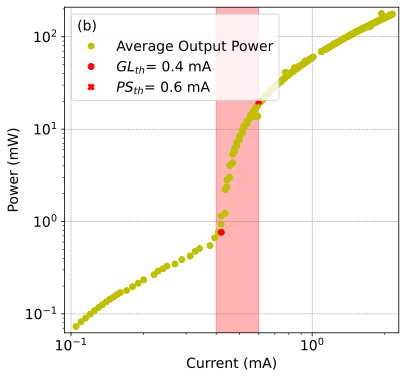

In [67]:
# plotting routine

from numpy.polynomial.polynomial import polyfit

plt.figure(figsize=(6,6))

plt.plot(ds3_mA_final, ds3_V_final,'y.', label = 'Average Output Power', markersize = 12)
plt.plot(0.42, 0.764, 'ro', label=r'$GL_{th}$' '= 0.4 mA')
plt.plot(0.6, 20, 'rX', label=r'$PS_{th}$' '= 0.6 mA')
#plt.plot(0.45, 20, 'rX', label=r'$PS_{th}$' '= 0.6')
#plt.axvspan(0, 0.45, color='blue', alpha=0.3)
#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.axvspan(0.4, 0.6, color='red', alpha=0.3)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Current (mA)")
plt.ylabel("Detector (V)")

plt.margins(x=0.02, y=0.02)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
l = plt.legend(loc="upper left", title='(b)')
l._legend_box.align = "left"

plt.xlabel("Current (mA)")
plt.ylabel("Power (mW)")
ax = plt.gca()

#plt.savefig('final-report/PH450ReportTemplate-LaTeX/images/4-r1-2.png', bbox_inches='tight', dpi= 300)

In [68]:
# DS-9 9.5 GHz 

# Preparing the data according to notes.
path = 'data-sets/data-set-9'
ds9_files = natsort.natsorted(glob.glob(path+ '/*.Wfm.csv'))

# Array of current supplied in sequence of ds9_files
ds9_mA = np.array([0.00,0.1,0.3,0.375,0.385,0.395,0.4,0.408,0.415,0.416,0.431,0.440,0.441,0.452,0.468,0.49,0.513,0.535,0.545,0.56,0.572,0.605,0.001,0.69,0.797,0.891,1.06,1.123,1.256,1.394,1.550,1.636,1.731,1.863,1.952])


# Offsets for sensitives of 5, 10 mV/div, unfortunately seems I dont have one for measurements with around 2 mV/div
offset_1 = np.average(pd.read_csv(ds9_files[0]))
offset_2 = np.average(pd.read_csv(ds9_files[22]))

# Creating new data-frame with all data
ds9_corrected = pd.DataFrame()

j = 0

for i,j in zip(ds9_files, range(0,len(ds9_files),1)): 
    ds9_corrected.insert(j,ds9_mA[j],(pd.read_csv(i)))
    j += 1

# Trying to check if there is any change in threshold.

avgs_ds9, stds_ds9, skews_ds9, kurts_ds9, avgs_sq_ds9 = np.array([]), np.array([]), np.array([]), np.array([]),  np.array([])

ds9_mA = np.delete(ds9_mA, 22)
ds9_files = np.delete(ds9_files, 22)

n_row = 100000

for i in ds9_files:
    average = np.average(pd.read_csv(i, nrows=n_row))
    avgs_ds9 = np.append(avgs_ds9,average)
    std = np.std(pd.read_csv(i, nrows=n_row))
    stds_ds9 = np.append(stds_ds9,std)
    skew = stats.skew(pd.read_csv(i, nrows=n_row))
    skews_ds9 = np.append(skews_ds9, skew)
    kurt = stats.kurtosis(pd.read_csv(i, nrows=n_row))
    kurts_ds9 = np.append(kurts_ds9, kurt)
    avg_sq = np.average(pd.read_csv(i, nrows=n_row)**2)
    avgs_sq_ds9 = np.append(avgs_sq_ds9, avg_sq)


In [ ]:
# checking backgroud points are removed from data-set-9

#ds9_mA = np.delete(ds9_mA,22)
#avgs_ds0 = np.delete(avgs_ds9,22)
print(len(ds9_mA))
print(len(avgs_ds9))

In [69]:
# DS-10 20 GHz 

import natsort
import glob
from RSRTxReadBin import RTxReadBin
from scipy import stats

# Preparing the data according to notes.
path = 'data-sets/data-set-10'
ds10_files = natsort.natsorted(glob.glob(path+ '/*.Wfm.bin'))

# Array of current supplied in sequence of ds9_files
ds10_mA = np.array([0,0,0.202,0.304,0.35,0.36,0.375,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.485,0.5252,0.635,0.76,0.825,0.97,1.14,1.439,1.715,1.900,1.902,1.902,1.902])

# Offsets for sensitivty of 2mV/div
offset_y, offset_x, offset_S = RTxReadBin('data-sets/data-set-10/RefCurve_2022-02-16_10_174148.Wfm.bin')
offset = np.average(offset_y)

# Preparing the data according to notes.
path = 'data-sets/data-set-10/'
ds10_files = natsort.natsorted(glob.glob(path+ '/*.Wfm.bin'))

# Offsets for sensitivty of 2mV/div
offset_y, offset_x, offset_S = RTxReadBin(ds10_files[0])
offset_ds10 = np.average(offset_y)

avgs_ds10, stds_ds10, skews_ds10, kurts_ds10, avgs_sq_ds10 = np.array([]), np.array([]), np.array([]), np.array([]), np.array([])

def ds11_stats(file):
    y, x, S = RTxReadBin(file)
    y -= offset
    y = y.flat[0:100000]
    y = [0 if i < 0 else i for i in y]
    avg = np.average(y)
    std = np.std(y)
    skew = stats.skew(y)
    kurt = stats.kurtosis(y)
    avg_sq = np.average(np.square(y))
    return avg, std, skew, kurt, avg_sq

for file in ds10_files:
    avg, std, skew, kurt, avg_sq = ds11_stats(file)
    avgs_ds10 = np.append(avgs_ds10, avg)
    stds_ds10 = np.append(stds_ds10, std)
    skews_ds10 = np.append(skews_ds10, skew)
    kurts_ds10 = np.append(kurts_ds10, kurt)
    avgs_sq_ds10 = np.append(avgs_sq_ds10, avg_sq)


In [70]:
# DS-11 9.5 GHz with OD

# Preparing the data according to notes.
path = 'data-sets/data-set-11/'
ds11_files = natsort.natsorted(glob.glob(path+ '/*.Wfm.bin'))
 
# Offsets for sensitivty of 2mV/div
offset_y, offset_x, offset_S = RTxReadBin(ds11_files[0])
offset_ds11 = np.average(offset_y)

ds11_mA = np.array([0,0.1,0.2,0.351,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.479,0.51,0.55,0.6,0.713,0.9,1,1.203,1.5,1.752,1.923])

avgs, stds, skews, kurts, avgs_sq = np.array([]), np.array([]), np.array([]), np.array([]), np.array([])

for file in ds11_files:
    avg, std, skew, kurt, avg_sq = ds11_stats(file)
    avgs = np.append(avgs, avg)
    stds = np.append(stds, std)
    skews = np.append(skews, skew)
    kurts = np.append(kurts, kurt)
    avgs_sq = np.append(avgs_sq, avg_sq)


24
24
slope eff (amp) , (amp-od): 0.11915198431490619 0.08913605341590668
y-coeff (amp) , (amp-od): -0.04806746845234868 -0.038825500646385395


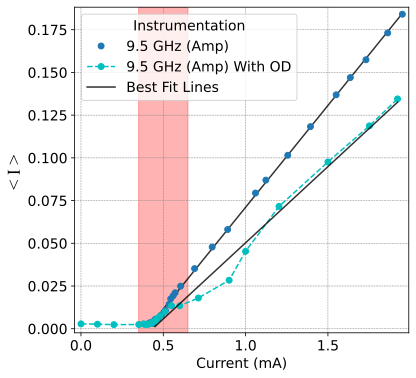

In [71]:
# <N> (V) / I (mA)

print(len(ds11_mA))
print(len(ds11_files))

plt.figure(figsize=(6,6))
plt.axvspan(0.35, 0.65, color='red', alpha=0.3)
#plt.axline((0.4, 0),(1,0.025), linewidth=2, color='b')

m_avg, b_avg = np.polyfit(ds9_mA[15:],avgs_ds9[15:],1)
plt.plot(ds9_mA[15:],(m_avg*ds9_mA[15:])+b_avg, color = 'black', alpha =0.8)

plt.plot(ds9_mA[9:], avgs_ds9[9:], '.', markersize = 12, label = '9.5 GHz (Amp)')

plt.plot(ds11_mA, avgs, 'c.--', markersize = 12, label = '9.5 GHz (Amp) With OD')

m_avg_2, b_avg_2 = np.polyfit(ds11_mA[11:],avgs[11:],1)
plt.plot(ds11_mA[11:],(m_avg_2*ds11_mA[11:])+b_avg_2, color = 'black', label='Best Fit Lines', alpha =0.8)

#plt.plot(ds10_mA, avgs_ds10*10,'g.-',label = '20 GHz x 10', alpha=0.2)
#plt.plot(ds10_mA, avgs_ds10,'g.-', label = '20 GHz')
csfont = {'fontname':'Times New Roman'}
plt.margins(x=0.02, y=0.02)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc="upper left", title='Instrumentation')
plt.xlabel("Current (mA)")
plt.ylabel("< I > ", fontsize=18 ,**csfont)
ax = plt.gca()

print('slope eff (amp) , (amp-od):', m_avg, m_avg_2 )
print('y-coeff (amp) , (amp-od):', b_avg, b_avg_2 )

#plt.savefig('final-report/PH450ReportTemplate-LaTeX/images/moments-avg.png', bbox_inches='tight', dpi= 300)

24
24
slope eff : 0.006988342870911896
y-coeff : -0.0026211933036033312
glt : 0.3750808098603348


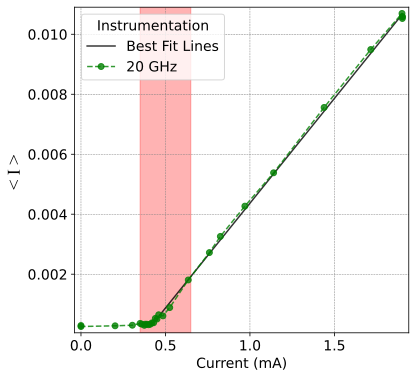

In [72]:
# <N> (V) / I (mA)

print(len(ds11_mA))
print(len(ds11_files))

plt.figure(figsize=(6,6))
plt.axvspan(0.35, 0.65, color='red', alpha=0.3)
#plt.axline((0.4, 0),(1,0.025), linewidth=2, color='b')
#plt.plot(ds9_mA, avgs_ds9, '.-', markersize = 8, label = '9.5 GHz (Amp)')
#lt.plot(ds11_mA, avgs, 'c.-', alpha= 0.8, markersize = 8, label = '9.5 GHz (Amp) With OD')
#plt.plot(ds10_mA, avgs_ds10*10,'g.-',label = '20 GHz x 10', alpha=0.2)

m_avg_3, b_avg_3 = np.polyfit(ds10_mA[15:],avgs_ds10[15:],1)
plt.plot(ds10_mA[15:],(m_avg_3*ds10_mA[15:])+b_avg_3, color = 'black', label='Best Fit Lines', alpha =0.8)

plt.plot(ds10_mA, avgs_ds10,'g.--', markersize = 12, label = '20 GHz', alpha=0.8)

plt.margins(x=0.02, y=0.02)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc="upper left", title='Instrumentation')
plt.xlabel("Current (mA)")
plt.ylabel("< I > ", fontsize=18, **csfont)
ax = plt.gca()

print('slope eff :', m_avg_3 )
print('y-coeff :', b_avg_3 )
print('glt :', -b_avg_3/m_avg_3 )

#plt.savefig('final-report/PH450ReportTemplate-LaTeX/images/moments-avg-20ghz.png', bbox_inches='tight', dpi= 300)

24
24


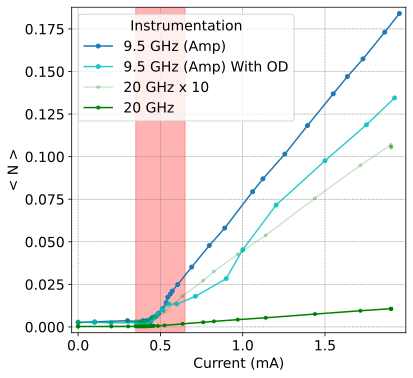

In [73]:
# <N> (V) / I (mA)

print(len(ds11_mA))
print(len(ds11_files))

plt.figure(figsize=(6,6))
plt.axvspan(0.35, 0.65, color='red', alpha=0.3)
#plt.axline((0.4, 0),(1,0.025), linewidth=2, color='b')
plt.plot(ds9_mA, avgs_ds9, '.-', markersize = 8, label = '9.5 GHz (Amp)')
plt.plot(ds11_mA, avgs, 'c.-', alpha= 0.8, markersize = 8, label = '9.5 GHz (Amp) With OD')
plt.plot(ds10_mA, avgs_ds10*10,'g.-',label = '20 GHz x 10', alpha=0.2)
plt.plot(ds10_mA, avgs_ds10,'g.-', label = '20 GHz')

plt.margins(x=0.02, y=0.02)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(title='Instrumentation',loc="upper left")
plt.xlabel("Current (mA)")
plt.ylabel("< N >")
ax = plt.gca()

#plt.savefig('final-report/PH450ReportTemplate-LaTeX/images/4-r1-1.png', bbox_inches='tight', dpi= 300)

24
24


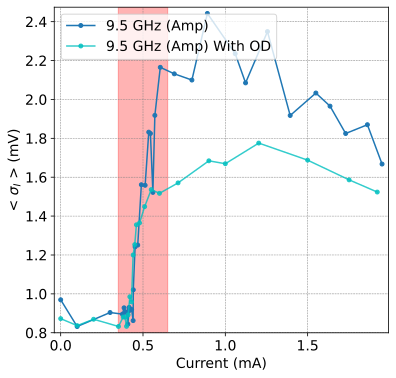

In [74]:
# <N> (V) / I (mA)

n = 2

print(len(ds11_mA))
print(len(ds11_files))

plt.figure(figsize=(6,6))
#plt.axline((0.4, 0),(1,0.025), linewidth=2, color='b')
plt.plot(ds9_mA, stds_ds9*1000, '.-', markersize = 8, label = '9.5 GHz (Amp)')
plt.plot(ds11_mA, stds*1000, 'c.-', alpha= 0.8, markersize = 8, label = '9.5 GHz (Amp) With OD')
#plt.plot(ds10_mA[n:], stds_ds10[n:]*10,'g.-',label = '20 GHz x 10', alpha=0.2)
#plt.plot(ds10_mA[n:], stds_ds10[n:],'g.-', label = '20 GHz')
plt.axvspan(0.35, 0.65, color='red', alpha=0.3)

plt.margins(x=0.02, y=0.02)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc="upper left")
plt.xlabel("Current (mA)")
plt.ylabel("< $\sigma_I$ > (mV)")
ax = plt.gca()

#plt.savefig('final-report/PH450ReportTemplate-LaTeX/images/moments-std-1.png', bbox_inches='tight', dpi= 300)

24
24


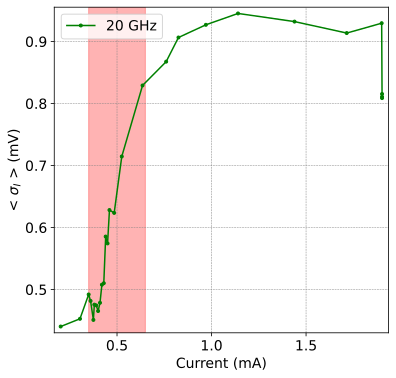

In [76]:
# <N> (V) / I (mA)

n = 2

print(len(ds11_mA))
print(len(ds11_files))

plt.figure(figsize=(6,6))
#plt.axline((0.4, 0),(1,0.025), linewidth=2, color='b')
#plt.plot(ds9_mA, stds_ds9, '.-', markersize = 8, label = '9.5 GHz (Amp)')
#plt.plot(ds11_mA, stds, 'c.-', alpha= 0.8, markersize = 8, label = '9.5 GHz (Amp) With OD')
#plt.plot(ds10_mA[n:], stds_ds10[n:]*10,'g.-',label = '20 GHz x 10', alpha=0.2)
plt.plot(ds10_mA[n:], stds_ds10[n:]*1000,'g.-', label = '20 GHz')
plt.axvspan(0.35, 0.65, color='red', alpha=0.3)

plt.margins(x=0.02, y=0.02)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc="upper left")
plt.xlabel("Current (mA)")
plt.ylabel("< $\sigma_I$ > (mV)")
ax = plt.gca()


24
24


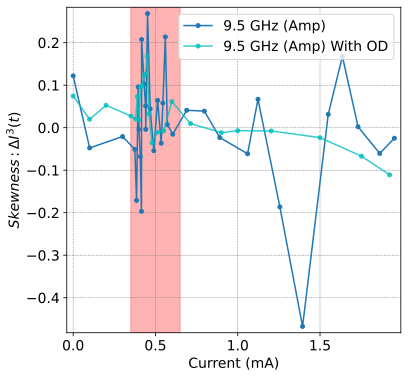

In [77]:
# <N> (V) / I (mA)

n = 2

print(len(ds11_mA))
print(len(ds11_files))

plt.figure(figsize=(6,6))
#plt.axline((0.4, 0),(1,0.025), linewidth=2, color='b')
plt.plot(ds9_mA, skews_ds9, '.-', markersize = 8, label = '9.5 GHz (Amp)')
plt.plot(ds11_mA, skews, 'c.-', alpha= 0.8, markersize = 8, label = '9.5 GHz (Amp) With OD')
#plt.plot(ds10_mA[n:], stds_ds10[n:]*10,'g.-',label = '20 GHz x 10', alpha=0.2)
#plt.plot(ds10_mA[n:], skews_ds10[n:],'g.-', label = '20 GHz')
plt.axvspan(0.35, 0.65, color='red', alpha=0.3)

plt.margins(x=0.02, y=0.02)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc="upper right")
plt.xlabel("Current (mA)")
plt.ylabel(r"$Skewness : \Delta I^3(t)$", **csfont)
ax = plt.gca()

#plt.savefig('final-report/PH450ReportTemplate-LaTeX/images/moments-skew-1.png', bbox_inches='tight', dpi= 300)

24
24


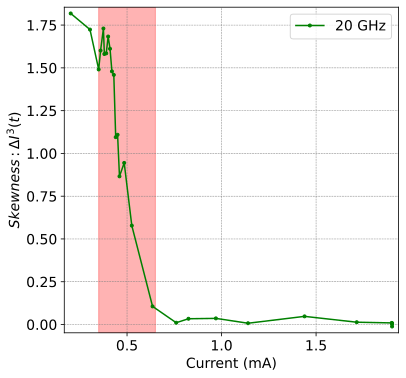

In [78]:
# <N> (V) / I (mA)

n = 2

print(len(ds11_mA))
print(len(ds11_files))

plt.figure(figsize=(6,6))
#plt.axline((0.4, 0),(1,0.025), linewidth=2, color='b')
#plt.plot(ds9_mA, skews_ds9, '.-', markersize = 8, label = '9.5 GHz (Amp)')
#plt.plot(ds11_mA, skews, 'c.-', alpha= 0.8, markersize = 8, label = '9.5 GHz (Amp) With OD')
#plt.plot(ds10_mA[n:], stds_ds10[n:]*10,'g.-',label = '20 GHz x 10', alpha=0.2)
plt.plot(ds10_mA[n:], skews_ds10[n:],'g.-', label = '20 GHz')
plt.axvspan(0.35, 0.65, color='red', alpha=0.3)

plt.margins(x=0.02, y=0.02)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc="upper right")
plt.xlabel("Current (mA)")
plt.ylabel(r"$Skewness : \Delta I^3(t)$", **csfont)
ax = plt.gca()

#plt.savefig('final-report/PH450ReportTemplate-LaTeX/images/moments-skew-2.png', bbox_inches='tight', dpi= 300)

24
24


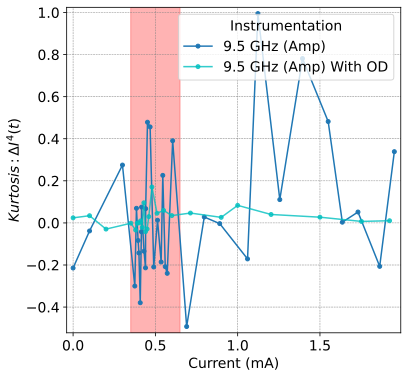

In [79]:
# <N> (V) / I (mA)

n = 2

print(len(ds11_mA))
print(len(ds11_files))

plt.figure(figsize=(6,6))
plt.axvspan(0.35, 0.65, color='red', alpha=0.3)
#plt.axline((0.4, 0),(1,0.025), linewidth=2, color='b')
plt.plot(ds9_mA, kurts_ds9, '.-', markersize = 8, label = '9.5 GHz (Amp)')
plt.plot(ds11_mA, kurts, 'c.-', alpha= 0.8, markersize = 8, label = '9.5 GHz (Amp) With OD')
#plt.plot(ds10_mA[n:], stds_ds10[n:]*10,'g.-',label = '20 GHz x 10', alpha=0.2)
#plt.plot(ds10_mA[n:], kurts_ds10[n:],'g.-', label = '20 GHz')

plt.margins(x=0.02, y=0.02)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc="upper right", title='Instrumentation')
plt.xlabel("Current (mA)")
plt.ylabel(r"$Kurtosis : \Delta I^4(t)$", **csfont)
ax = plt.gca()

#plt.savefig('final-report/PH450ReportTemplate-LaTeX/images/momements-kurts.png', bbox_inches='tight', dpi= 300)

24
24


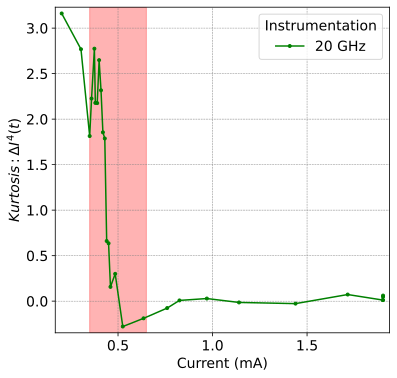

In [81]:
# <N> (V) / I (mA)

n = 2

print(len(ds11_mA))
print(len(ds11_files))

plt.figure(figsize=(6,6))
plt.axvspan(0.35, 0.65, color='red', alpha=0.3)
#plt.axline((0.4, 0),(1,0.025), linewidth=2, color='b')
#plt.plot(ds9_mA, kurts_ds9, '.-', markersize = 8, label = '9.5 GHz (Amp)')
#plt.plot(ds11_mA, kurts, 'c.-', alpha= 0.8, markersize = 8, label = '9.5 GHz (Amp) With OD')
#plt.plot(ds10_mA[n:], stds_ds10[n:]*10,'g.-',label = '20 GHz x 10', alpha=0.2)
plt.plot(ds10_mA[n:], kurts_ds10[n:],'g.-', label = '20 GHz')

plt.margins(x=0.02, y=0.02)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc="upper right", title='Instrumentation')
plt.xlabel("Current (mA)")
plt.ylabel(r"$Kurtosis : \Delta I^4(t)$", **csfont)
ax = plt.gca()


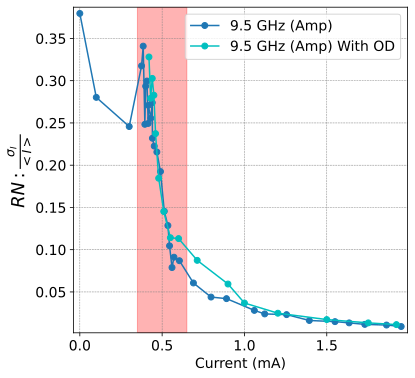

In [83]:
# <sigma_N>/ <N>  / I (mA)

o1 = 0
n = 8

plt.figure(figsize=(6,6))

plt.plot(ds9_mA[o1:], (stds_ds9[o1:]/avgs_ds9[o1:]), 'o-', label = '9.5 GHz (Amp)')
#plt.plot(ds10_mA[o1+n:], stds_ds10[o1+n:]/avgs_ds10[o1+n:], 'go-', label = '20 GHz')
plt.plot(ds11_mA[o1+n:], stds[o1+n:]/avgs[o1+n:], 'co-', label = '9.5 GHz (Amp) With OD')
plt.axvspan(0.35, 0.65, color='red', alpha=0.3)

plt.margins(x=0.02, y=0.02)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc="upper right")
plt.xlabel("Current (mA)")
plt.ylabel(r"$RN : \frac{\sigma_I}{<I>}$", **csfont, fontsize = 18)
ax = plt.gca()


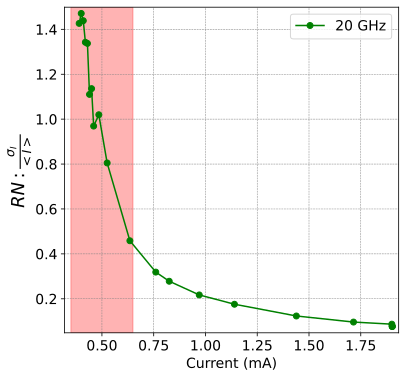

In [84]:
# <sigma_N>/ <N>  / I (mA)

o1 = 0
n = 8

plt.figure(figsize=(6,6))

#plt.plot(ds9_mA[o1:], (stds_ds9[o1:]/avgs_ds9[o1:]), 'o-', label = '9.5 GHz (Amp)')
plt.plot(ds10_mA[o1+n:], stds_ds10[o1+n:]/avgs_ds10[o1+n:], 'go-', label = '20 GHz')
#plt.plot(ds11_mA[o1+n:], stds[o1+n:]/avgs[o1+n:], 'co-', label = '9.5 GHz (Amp) With OD')
plt.axvspan(0.35, 0.65, color='red', alpha=0.3)

plt.margins(x=0.02, y=0.02)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc="upper right")
plt.xlabel("Current (mA)")
plt.ylabel(r"$RN : \frac{\sigma_I}{<I>}$", **csfont, fontsize = 18)
ax = plt.gca()


In [85]:
# g2 function

def g2_function_ds10(file):
    y, x, S = RTxReadBin(file)
    y -= offset_ds10
    g2 = (np.sum(y**2)/(np.average(y)**2))/len(y)
    return g2

def g2_function_ds11(file):
    y, x, S = RTxReadBin(file)
    y -= offset_ds11
    g2 = (np.sum(y**2)/(np.average(y)**2))/len(y)
    return g2

g2_array_ds10 = np.array([])
g2_array_ds11 = np.array([])

for file in ds10_files:
    g2_array_ds10 = np.append(g2_array_ds10, g2_function_ds10(file))

for file in ds11_files:
    g2_array_ds11 = np.append(g2_array_ds11, g2_function_ds11(file))

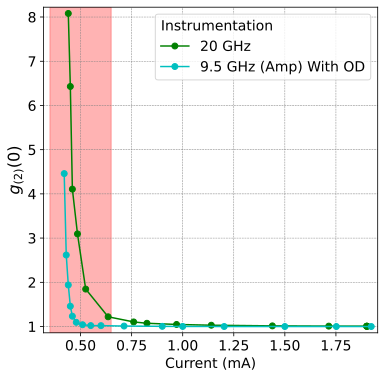

In [86]:
plt.figure(figsize=(6,6))

plt.plot(ds10_mA[13:],g2_array_ds10[13:],'go-', label = '20 GHz')
plt.plot(ds11_mA[8:],g2_array_ds11[8:],'co-', label = '9.5 GHz (Amp) With OD')
plt.axvspan(0.35, 0.65, color='red', alpha=0.3)
plt.margins(x=0.02, y=0.02)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc="upper right")
plt.xlabel("Current (mA)")
l = plt.legend(loc="upper right", title='Instrumentation')
l._legend_box.align = "left"
plt.ylabel(r"$g_{(2)}{(0)}}$", **csfont, fontsize = 16)
ax = plt.gca()


In [87]:
# g2 of tau

def g2_tau_ds10(file, t):
    y, x, S = RTxReadBin(file)
    y -= offset_ds10
    n = t
    print(int(len(y)/n))
    g2 = np.array([])
    y = y[0:100000]

    for i in range(int(len(y)/n)):
        g2_t = np.average( np.average(y) * np.average(y[0:i*n]))/ np.average(y)**2
        g2 = np.append(g2, g2_t)
    return g2

def g2_tau_ds11(file, t):
    y, x, S = RTxReadBin(file)
    y -= offset_ds11
    n = t
    print(int(len(y)/n))
    g2 = np.array([])

    for i in range(int(len(y)/n)):
        #g2_t = (np.average( np.average(y) * np.average(y[0:i*n])))/(np.average(y)**2)
        g2_t = (np.average( np.average(y) * np.average(y[0:i*n])))/(np.average(y**2))
        g2 = np.append(g2, g2_t)
    return g2

In [88]:
# ds10 taus for i = 0.41, 0.485, 0.635, 1.4

t = 1000

g2_tau_ds10_o41 = np.array([])
g2_tau_ds10_o485 = np.array([])
g2_tau_ds10_o635 = np.array([])
g2_tau_ds10_1o4 = np.array([])

g2_tau_ds10_o41 = np.append(g2_tau_ds10_o41, g2_tau_ds10(ds10_files[7], t))
g2_tau_ds10_o485 = np.append(g2_tau_ds10_o485, g2_tau_ds10(ds10_files[17], t))
g2_tau_ds10_o635 = np.append(g2_tau_ds10_o635, g2_tau_ds10(ds10_files[18], t))
g2_tau_ds10_1o4 = np.append(g2_tau_ds10_1o4, g2_tau_ds10(ds10_files[23], t))

10000


/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


10000
10000
10000


Text(0.5, 0.01, 'Time (ns)')

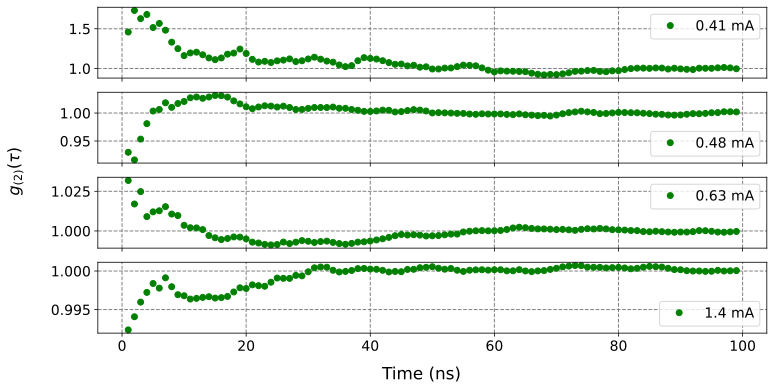

In [89]:
x = np.linspace(0,50,1000)

fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(4, hspace=0.2)
axs = gs.subplots(sharex=True)
axs[0].plot(g2_tau_ds10_o41,'go', label = '0.41 mA')
axs[0].legend()
axs[1].plot(g2_tau_ds10_o485,'go', label = '0.48 mA')
axs[1].legend()
axs[2].plot(g2_tau_ds10_o635,'go', label = '0.63 mA')
axs[2].legend()
axs[3].plot(g2_tau_ds10_1o4,'go', label = '1.4 mA')
axs[3].legend()

axs[0].grid(color = 'grey', linestyle = '--', linewidth = 1)
axs[1].grid(color = 'grey', linestyle = '--', linewidth = 1)
axs[2].grid(color = 'grey', linestyle = '--', linewidth = 1)
axs[3].grid(color = 'grey', linestyle = '--', linewidth = 1)

fig.supylabel(r'$g_{(2)}(\tau)$', fontsize = 16)
fig.supxlabel('Time (ns)')


In [90]:
# cell takes almost 25 minutes to run, just see html version of output if you dont plan on editing the code

# g2 tau ds 11

g2_tau_ds11_o41 = np.array([])
g2_tau_ds11_o51 = np.array([])
g2_tau_ds11_o6 = np.array([])
g2_tau_ds11_1o2 = np.array([])

g2_tau_ds11_o41 = np.append(g2_tau_ds11_o41, g2_tau_ds11(ds11_files[7], t))
g2_tau_ds11_o51 = np.append(g2_tau_ds11_o51, g2_tau_ds11(ds11_files[14], t))
g2_tau_ds11_o6 = np.append(g2_tau_ds11_o6, g2_tau_ds11(ds11_files[17], t))
g2_tau_ds11_1o2 = np.append(g2_tau_ds11_1o2, g2_tau_ds11(ds11_files[21], t))

10000


/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


10000
10000
10000


In [91]:
timescale = np.linspace(0,10,10000)

fig = plt.figure(figsize=(10,6))
fig.suptitle('9.5 Ghz Amp Detector with OD$')
gs = fig.add_gridspec(4, hspace=0)
axs = gs.subplots()
axs[0].plot(g2_tau_ds11_o41,'.',label='0.41 mA')
axs[0].axhline(y=1, color='black', linestyle='--')
axs[0].legend(loc='right')
axs[1].plot(g2_tau_ds11_o51,'.',label='0.51 mA')
axs[1].axhline(y=1, color='black', linestyle='--')
axs[1].legend()
axs[2].plot(g2_tau_ds11_o6,'.',label='0.6 mA')
axs[2].axhline(y=1, color='black', linestyle='--')
axs[2].legend()
axs[3].plot(timescale, g2_tau_ds11_1o2,'.',label='1.0 mA')
axs[3].axhline(y=1, color='black', linestyle='--')
axs[3].legend()
fig.supylabel(r'$g^{(2)}(\tau)$')
fig.supxlabel(r'$\tau (\mu s)$')

Text(0.5, 0.01, '$\\tau (\\mu s)$')